## 1. Read Data

In [1]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/MyDrive/pacmann/suicide_rates_1990-2022.csv")

In [3]:
pd.set_option('display.max_columns', None)
df

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118555,NAC,North America and the Caribbean,USA,United States of America,2021,Female,55-74 years,Baby Boomers,420.0,0.246321,5.286824,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118556,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,276.0,0.146324,4.876199,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118557,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,158.0,0.075728,4.203972,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118558,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,127.0,0.022409,2.931077,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946


In [4]:
df.shape

(118560, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118560 entries, 0 to 118559
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   RegionCode                    118560 non-null  object 
 1   RegionName                    118560 non-null  object 
 2   CountryCode                   118560 non-null  object 
 3   CountryName                   118560 non-null  object 
 4   Year                          118560 non-null  int64  
 5   Sex                           118560 non-null  object 
 6   AgeGroup                      118560 non-null  object 
 7   Generation                    118560 non-null  object 
 8   SuicideCount                  118096 non-null  float64
 9   CauseSpecificDeathPercentage  114271 non-null  float64
 10  DeathRatePer100K              107896 non-null  float64
 11  Population                    112640 non-null  float64
 12  GDP                           111320 non-nul

In [6]:
df.columns

Index(['RegionCode', 'RegionName', 'CountryCode', 'CountryName', 'Year', 'Sex',
       'AgeGroup', 'Generation', 'SuicideCount',
       'CauseSpecificDeathPercentage', 'DeathRatePer100K', 'Population', 'GDP',
       'GDPPerCapita', 'GrossNationalIncome', 'GNIPerCapita', 'InflationRate',
       'EmploymentPopulationRatio'],
      dtype='object')

In [7]:
#select non float or int type columns
non_numb = df.select_dtypes(exclude=np.number).columns
non_numb

Index(['RegionCode', 'RegionName', 'CountryCode', 'CountryName', 'Sex',
       'AgeGroup', 'Generation'],
      dtype='object')

In [8]:
numb = df.select_dtypes(include=np.number).columns
numb

Index(['Year', 'SuicideCount', 'CauseSpecificDeathPercentage',
       'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'GrossNationalIncome', 'GNIPerCapita', 'InflationRate',
       'EmploymentPopulationRatio'],
      dtype='object')

In [9]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 22584


In [10]:
df[numb].describe().T

,count,mean,std,min,25%,50%,75%,max
Year,118560.0,2.005740e+03,8.745003e+00,1.990000e+03,1.999000e+03,2.006000e+03,2.013000e+03,2.022000e+03
SuicideCount,118096.0,6.363204e+01,2.540954e+02,0.000000e+00,0.000000e+00,4.000000e+00,3.200000e+01,6.787000e+03
CauseSpecificDeathPercentage,114271.0,3.873690e+00,7.317820e+00,0.000000e+00,0.000000e+00,5.861665e-01,4.355646e+00,1.000000e+02
DeathRatePer100K,107896.0,1.229979e+01,2.101617e+01,0.000000e+00,0.000000e+00,4.452366e+00,1.538462e+01,5.025126e+02
Population,112640.0,2.456184e+07,4.531156e+07,4.054200e+04,2.613805e+06,6.888434e+06,2.533364e+07,3.320316e+08
GDP,111320.0,4.883351e+11,1.653252e+12,2.197630e+08,1.162585e+10,6.268216e+10,3.013550e+11,2.331510e+13
GDPPerCapita,111320.0,1.742351e+04,1.933214e+04,6.023512e+01,3.941599e+03,9.708141e+03,2.519727e+04,1.337118e+05
GrossNationalIncome,108600.0,4.976795e+11,1.689591e+12,2.082832e+08,1.176795e+10,5.987715e+10,3.057210e+11,2.370530e+13
GNIPerCapita,107800.0,2.214722e+04,1.888640e+04,7.800000e+02,8.670000e+03,1.615000e+04,2.953000e+04,1.526300e+05
InflationRate,104100.0,2.028646e+01,1.630999e+02,-1.063010e+01,1.498961e+00,3.038888e+00,6.536199e+00,4.734914e+03


In [11]:
df[non_numb].describe().T

,count,unique,top,freq
RegionCode,118560,6,EU,45140
RegionName,118560,6,Europe,45140
CountryCode,118560,117,ARG,1740
CountryName,118560,117,Argentina,1740
Sex,118560,3,Male,58320
AgeGroup,118560,7,0-14 years,23712
Generation,118560,7,Generation Alpha,23712


In [12]:
#copy dataset
df_copy = copy.deepcopy(df)

## 2. Cleaning

In [13]:
df_copy

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118555,NAC,North America and the Caribbean,USA,United States of America,2021,Female,55-74 years,Baby Boomers,420.0,0.246321,5.286824,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118556,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,276.0,0.146324,4.876199,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118557,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,158.0,0.075728,4.203972,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118558,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,127.0,0.022409,2.931077,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946


### 2.1 Rename Values

In [14]:
# Check all unique values in the "CountryName" column
unique_countries = df_copy['CountryName'].unique()

# Print the unique values
print(unique_countries)

['Albania' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bahamas' 'Antigua and Barbuda' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Brunei Darussalam' 'Bulgaria'
 'Cabo Verde' 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Denmark' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Estonia' 'Fiji' 'Finland' 'France' 'French Guiana'
 'Georgia' 'Germany' 'Greece' 'Grenada' 'Guadeloupe' 'Guatemala' 'Guyana'
 'China, Hong Kong SAR' 'Hungary' 'Iceland' 'Iran (Islamic Republic of)'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan'
 'Republic of Korea' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lithuania'
 'Luxembourg' 'Maldives' 'Malta' 'Martinique' 'Mauritius' 'Mayotte'
 'Mexico' 'Republic of Moldova' 'Montenegro' 'Netherlands' 'New Zealand'
 'Nicaragua' 'North Macedonia' 'Norway' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Puerto Rico' 'R?union' 'Romania'
 'Russian 

In [15]:
# Rename "T?rkiye" with "Turkiye" and "R?union" with "R Union" in the "CountryName" column
df_copy['CountryName'] = df_copy['CountryName'].\
replace({'T?rkiye': 'Turkiye', 'R?union': 'R Union'})

In [16]:
# Check all unique values in the "CountryName" column
unique_countries = df_copy['CountryName'].unique()

# Print the unique values
print(unique_countries)

['Albania' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bahamas' 'Antigua and Barbuda' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Brunei Darussalam' 'Bulgaria'
 'Cabo Verde' 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Denmark' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Estonia' 'Fiji' 'Finland' 'France' 'French Guiana'
 'Georgia' 'Germany' 'Greece' 'Grenada' 'Guadeloupe' 'Guatemala' 'Guyana'
 'China, Hong Kong SAR' 'Hungary' 'Iceland' 'Iran (Islamic Republic of)'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan'
 'Republic of Korea' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lithuania'
 'Luxembourg' 'Maldives' 'Malta' 'Martinique' 'Mauritius' 'Mayotte'
 'Mexico' 'Republic of Moldova' 'Montenegro' 'Netherlands' 'New Zealand'
 'Nicaragua' 'North Macedonia' 'Norway' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Puerto Rico' 'R Union' 'Romania'
 'Russian 

### 2.2 Remove duplicated data

In [17]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df_copy.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 22584


In [18]:
# Drop duplicate rows from the DataFrame
df_copy = df_copy.drop_duplicates(keep = 'first')

# Optionally, you can print the shape of the cleaned DataFrame to verify the removal of duplicates
print(f"Shape of cleaned DataFrame after removing duplicates: {df_copy.shape}")

Shape of cleaned DataFrame after removing duplicates: (95976, 18)


### 2.3 Check unknown value from categorical data

In [19]:
# Create an empty dictionary to store the unknown value counts
unknown_counts = {}

# Iterate over the non-numeric columns to count "unknown" values
for column in non_numb:
    unknown_counts[column] = (df_copy[column] == 'Unknown').sum()

# Print the counts
for column, count in unknown_counts.items():
    print(f"Number of 'Unknown' values in column '{column}': {count}")

Number of 'Unknown' values in column 'RegionCode': 0
Number of 'Unknown' values in column 'RegionName': 0
Number of 'Unknown' values in column 'CountryCode': 0
Number of 'Unknown' values in column 'CountryName': 0
Number of 'Unknown' values in column 'Sex': 987
Number of 'Unknown' values in column 'AgeGroup': 5928
Number of 'Unknown' values in column 'Generation': 5928


### 2.4 Delete Column

Remove columns CauseSpecificDeathPercentage and DeathRatePer100K because we don't use it on the analysis process

In [20]:
df_copy = df_copy.drop(['CauseSpecificDeathPercentage','DeathRatePer100K'], axis=1)

### 2.5 Check missing value on each columns

In [21]:
df_copy.isna().sum()

RegionCode                       0
RegionName                       0
CountryCode                      0
CountryName                      0
Year                             0
Sex                              0
AgeGroup                         0
Generation                       0
SuicideCount                   292
Population                    4489
GDP                           5675
GDPPerCapita                  5675
GrossNationalIncome           7969
GNIPerCapita                  8610
InflationRate                11762
EmploymentPopulationRatio     6879
dtype: int64

### 2.6 Drop rows contained nan on columns suicidecount, inflation rate, and employment population ratio

In [22]:
#drop nan on those columns cause we can't replace it with another values
df_copy = df_copy.dropna(subset=['SuicideCount','InflationRate',\
                                 'EmploymentPopulationRatio']).reset_index\
                                  (drop = True)
df_copy

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,4.0,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,25-34 years,Millennials,3.0,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,25-34 years,Millennials,4.0,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81887,NAC,North America and the Caribbean,USA,United States of America,2021,Female,55-74 years,Baby Boomers,420.0,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
81888,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,276.0,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
81889,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,158.0,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
81890,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,127.0,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946


In [23]:
df_copy.isna().sum()

RegionCode                      0
RegionName                      0
CountryCode                     0
CountryName                     0
Year                            0
Sex                             0
AgeGroup                        0
Generation                      0
SuicideCount                    0
Population                      0
GDP                           899
GDPPerCapita                  899
GrossNationalIncome          2729
GNIPerCapita                 2539
InflationRate                   0
EmploymentPopulationRatio       0
dtype: int64

### 2.7 Handling missing value on GDP column

In [24]:
unique_regions = df_copy['RegionName'].unique()

# Print the unique values
print(unique_regions)

['Europe' 'Asia' 'Oceania' 'North America and the Caribbean'
 'Central and South America' 'Africa']


In [25]:
# Filter rows where GDP is missing
missing_gdp = df_copy[df_copy['GDP'].isnull()]

# Group by RegionName and count missing GDP values
missing_gdp_by_region = missing_gdp.groupby('RegionName')['GDP'].size().reset_index(name='Missing GDP Count')

# Print the result
print(missing_gdp_by_region)

                  RegionName  Missing GDP Count
0                       Asia                142
1  Central and South America                 73
2                     Europe                684


Now we try to visualize the data to check if there's any outlier

<ipython-input-26-863f07e378fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RegionName', y='GDP', data=df_copy, palette='viridis')


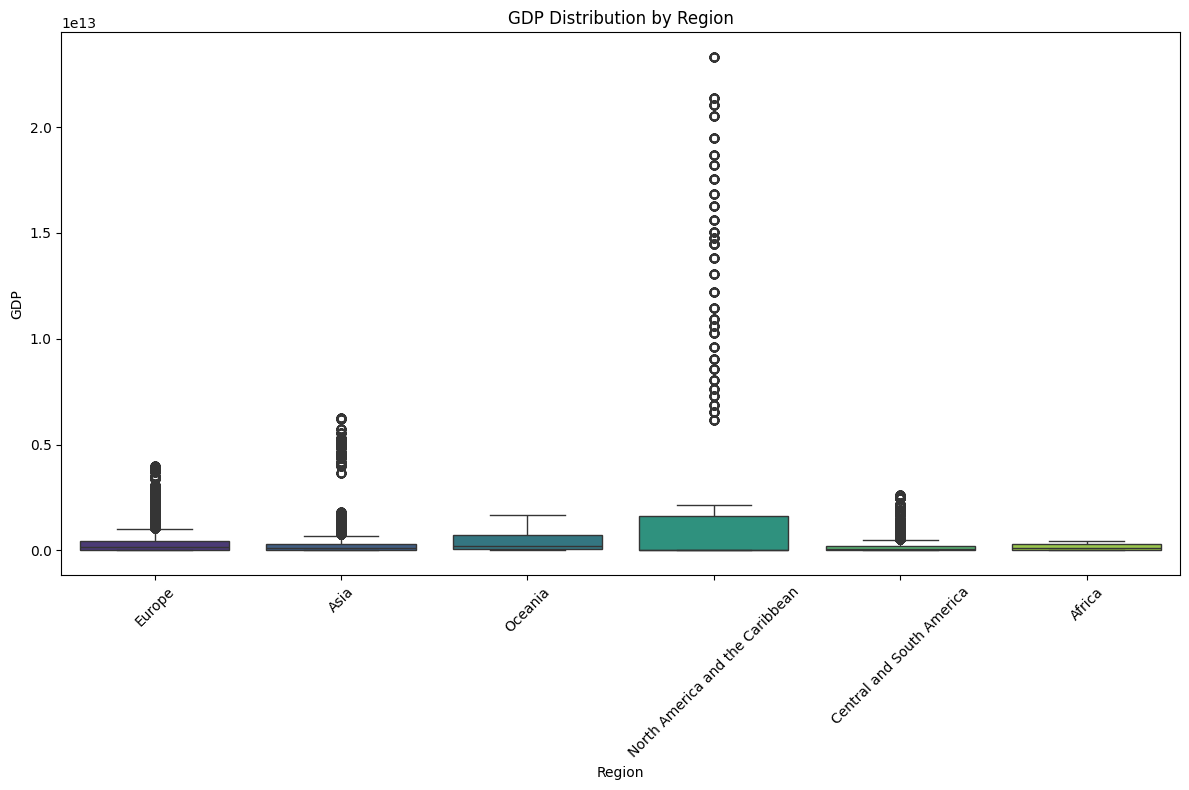

In [26]:
#visualization with outlier
# Create a box plot for GDP distribution by region
plt.figure(figsize=(12, 8))

# Box plot
sns.boxplot(x='RegionName', y='GDP', data=df_copy, palette='viridis')
plt.title('GDP Distribution by Region')
plt.xlabel('Region')
plt.ylabel('GDP')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

Due to we can't see the boxplot clearly, we try to hide the outliers value

<ipython-input-27-91f8518a20e2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RegionName', y='GDP', data=df_copy, palette='viridis', showfliers=False)


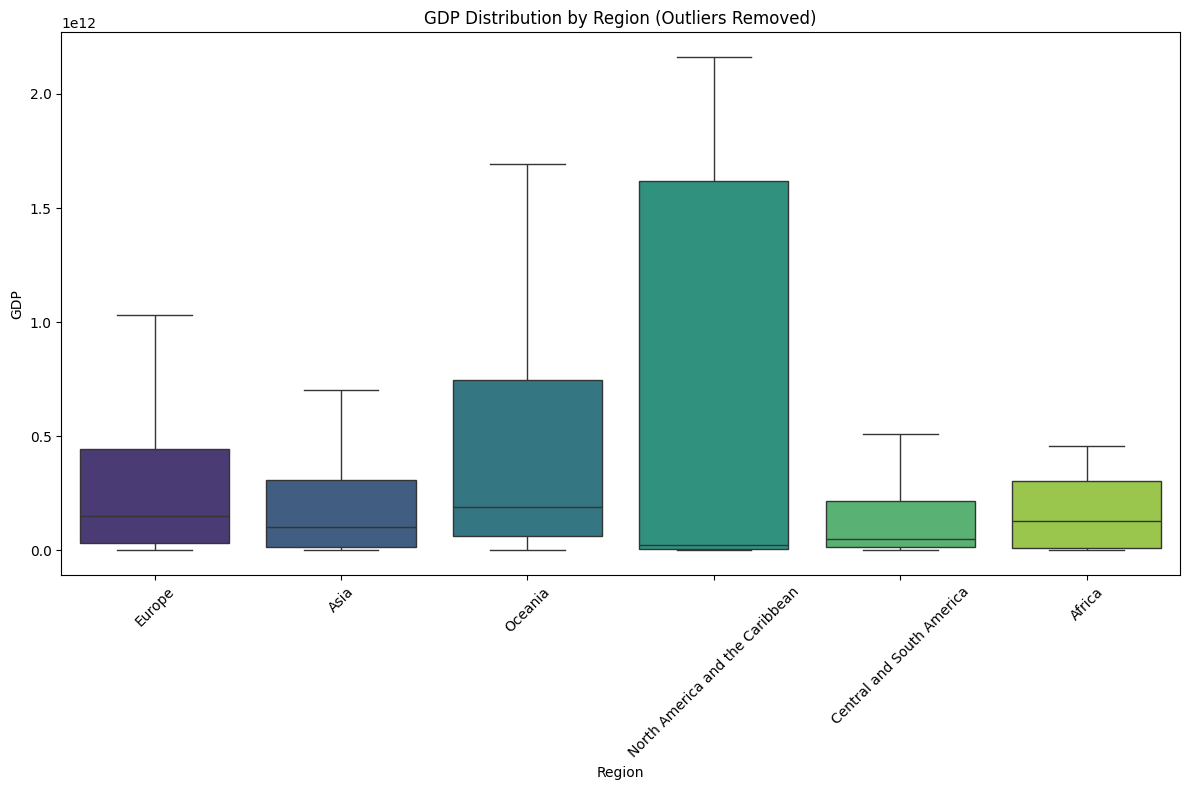

In [27]:
#visualize without outlier
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Box plot without outliers
sns.boxplot(x='RegionName', y='GDP', data=df_copy, palette='viridis', showfliers=False)
plt.title('GDP Distribution by Region (Outliers Removed)')
plt.xlabel('Region')
plt.ylabel('GDP')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

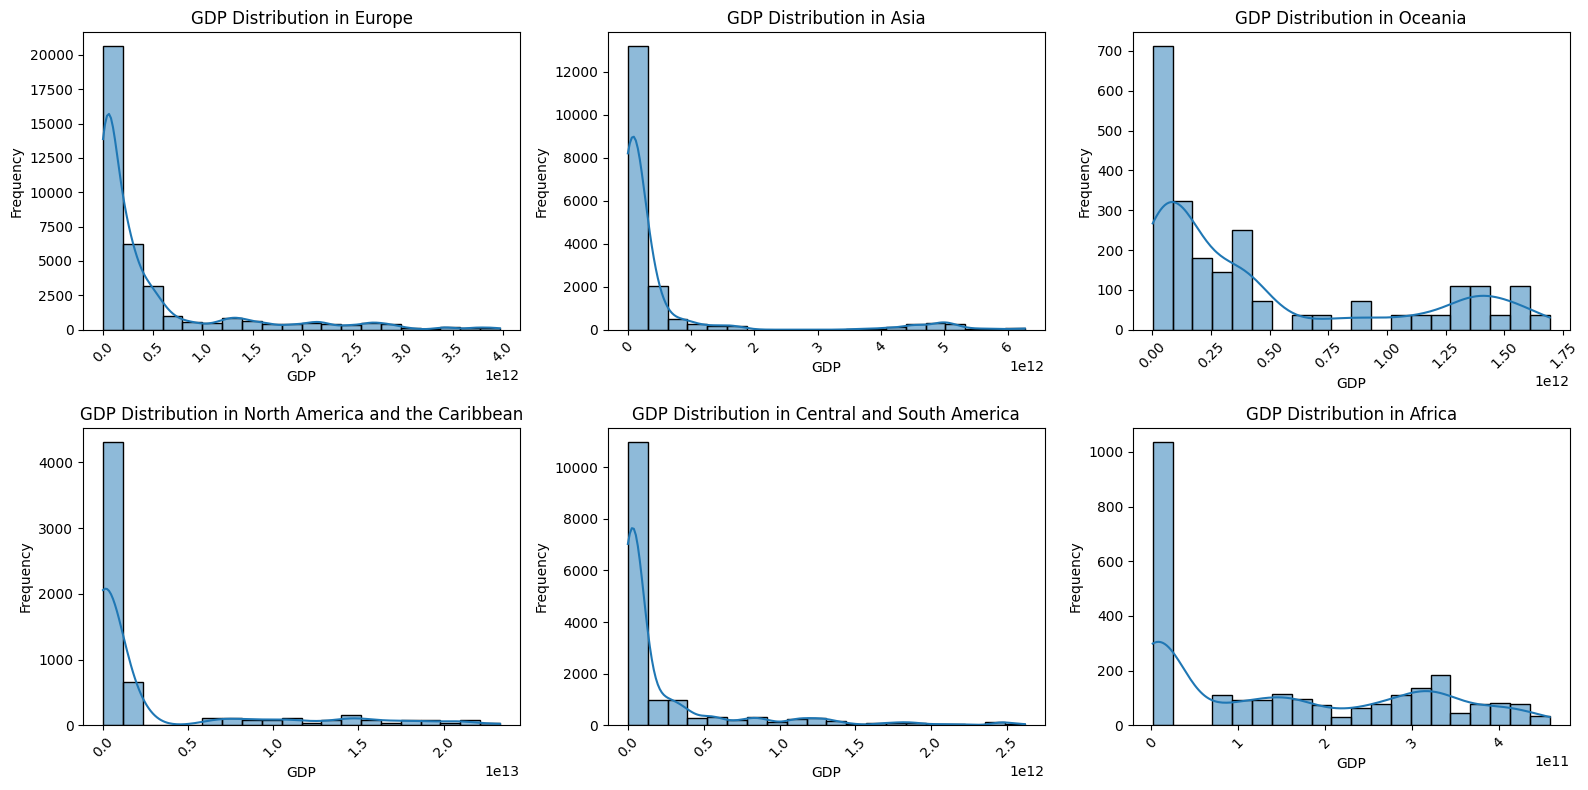

In [28]:
# Get the unique region names
unique_regions = df_copy['RegionName'].unique()

# Calculate the number of rows and columns for subplots
num_regions = len(unique_regions)
num_cols = 3  # Number of columns in the visualization
num_rows = -(-num_regions // num_cols)  # Ceiling division to determine the number of rows

# Create subplots with 3 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create separate histograms for GDP distribution of each region
for i, region in enumerate(unique_regions):
    ax = axes[i]  # Select the current axis

    # Filter data for the current region
    region_data = df_copy[df_copy['RegionName'] == region]['GDP'].dropna()

    # Create histogram on the current axis
    sns.histplot(region_data, bins=20, kde=True, ax=ax)
    ax.set_title(f'GDP Distribution in {region}')
    ax.set_xlabel('GDP')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove unused axes and adjust layout
for j in range(num_regions, num_cols * num_rows):
    axes[j].remove()
plt.tight_layout()

# Show the plot
plt.show()

Due to the fact that the data distribution is skewed, we use the median to fill in the missing value in the GDP column for each region.

In [29]:
# Calculate median GDP for each region
median_gdp_by_region = df_copy.groupby('RegionName')['GDP'].median()

# Fill missing GDP values with median GDP for each region
for region in median_gdp_by_region.index:
    region_median_gdp = median_gdp_by_region[region]
    df_copy.loc[df_copy['RegionName'] == region, 'GDP'] = df_copy.loc[df_copy['RegionName'] == region, 'GDP'].fillna(region_median_gdp)


In [30]:
# Check for missing values in the DataFrame
missing_values = df_copy.isnull().any()

# Print columns with missing values, if any
if missing_values.any():
    print("Columns with missing values:")
    print(missing_values[missing_values].index)
else:
    print("No missing values in the DataFrame.")

Columns with missing values:
Index(['GDPPerCapita', 'GrossNationalIncome', 'GNIPerCapita'], dtype='object')


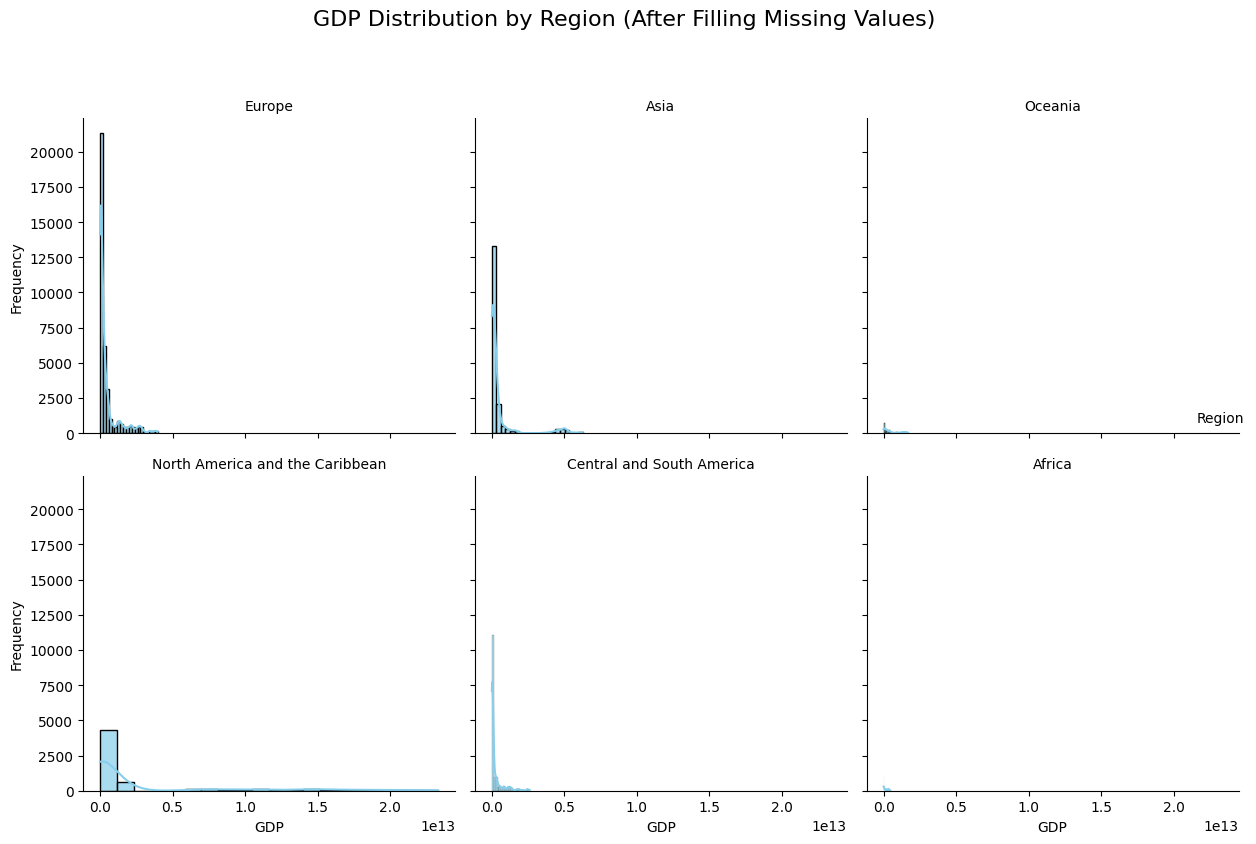

In [31]:
# Create a FacetGrid for separate plots by region
g = sns.FacetGrid(df_copy, col='RegionName', col_wrap=3, height=4)
g.map(sns.histplot, 'GDP', bins=20, kde=True, color='skyblue', alpha=0.7)
g.set_titles('{col_name}')
g.set_axis_labels('GDP', 'Frequency')
g.add_legend(title='Region')

plt.suptitle('GDP Distribution by Region (After Filling Missing Values)', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

In [32]:
df_copy.isna().sum()

RegionCode                      0
RegionName                      0
CountryCode                     0
CountryName                     0
Year                            0
Sex                             0
AgeGroup                        0
Generation                      0
SuicideCount                    0
Population                      0
GDP                             0
GDPPerCapita                  899
GrossNationalIncome          2729
GNIPerCapita                 2539
InflationRate                   0
EmploymentPopulationRatio       0
dtype: int64

### 2.8 Handling missing value on GDPPerCapita column

In [33]:
# Filter rows where GDPPerCapita is missing
missing_gdp_cap = df_copy[df_copy['GDPPerCapita'].isnull()]

# Group by RegionName and count missing GDPPerCapita values
missing_gdp_cap_by_region = missing_gdp_cap.groupby('RegionName')['GDPPerCapita'].size().reset_index(name='Missing GDPPerCapita Count')

# Print the result
print(missing_gdp_cap_by_region)

                  RegionName  Missing GDPPerCapita Count
0                       Asia                         142
1  Central and South America                          73
2                     Europe                         684


<ipython-input-34-210c65874acc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RegionName', y='GDPPerCapita', data=df_copy, palette='viridis')


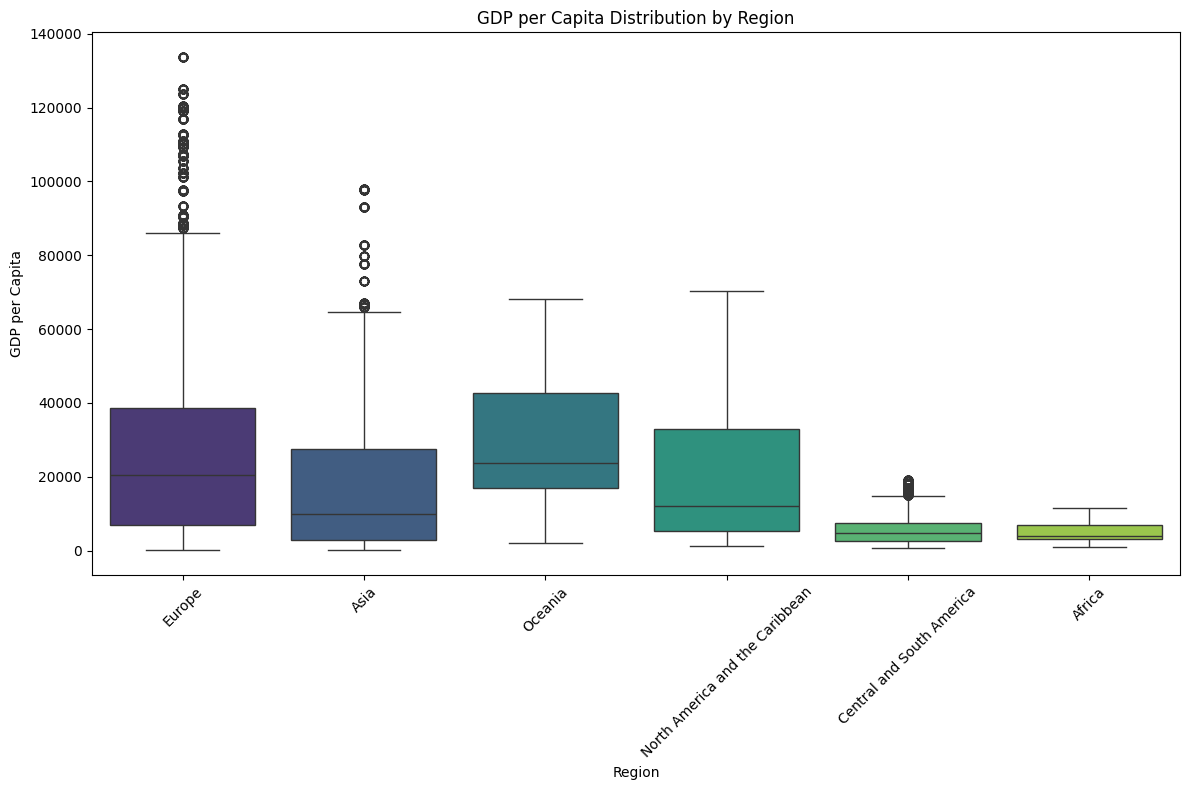

In [34]:
# Create a box plot or violin plot for GDPPerCapita distribution by region
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Box plot
sns.boxplot(x='RegionName', y='GDPPerCapita', data=df_copy, palette='viridis')
plt.title('GDP per Capita Distribution by Region')
plt.xlabel('Region')
plt.ylabel('GDP per Capita')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

<ipython-input-35-db0d12b7e31a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RegionName', y='GDPPerCapita', data=df_copy, palette='viridis', showfliers=False)


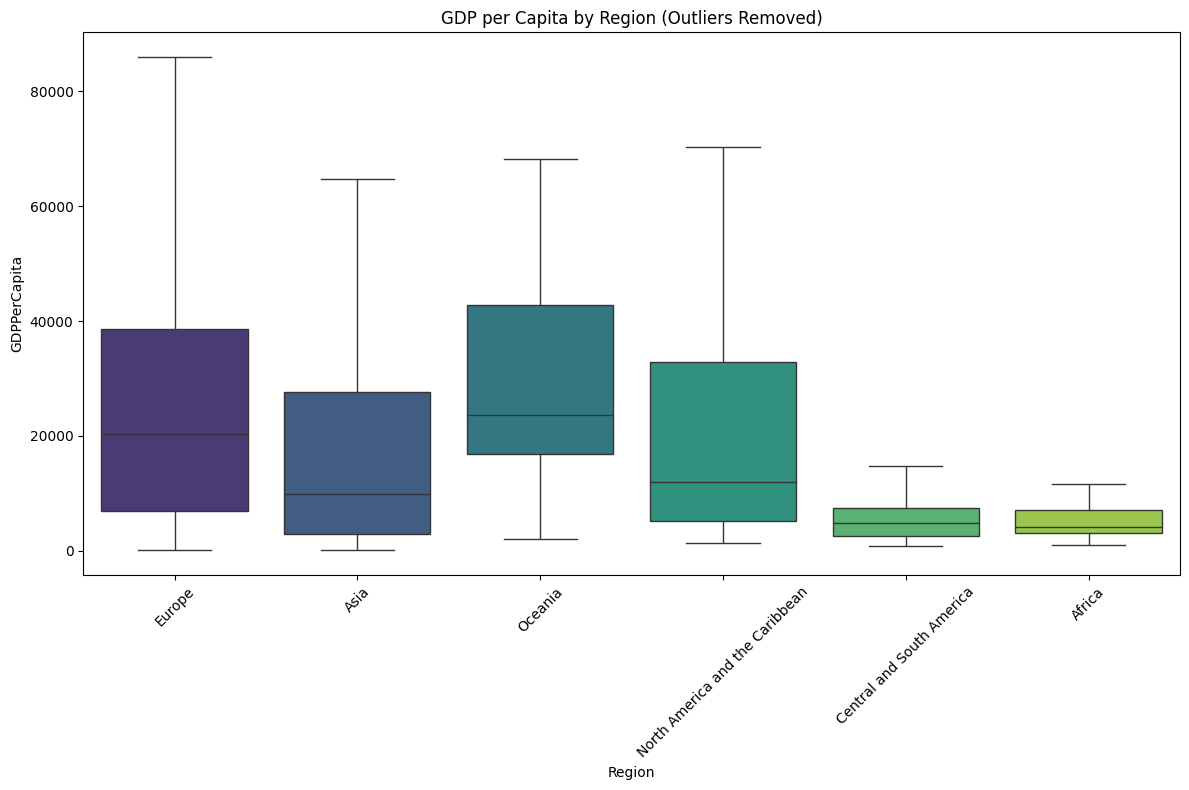

In [35]:
#visualize without outlier
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Box plot without outliers
sns.boxplot(x='RegionName', y='GDPPerCapita', data=df_copy, palette='viridis', showfliers=False)
plt.title('GDP per Capita by Region (Outliers Removed)')
plt.xlabel('Region')
plt.ylabel('GDPPerCapita')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

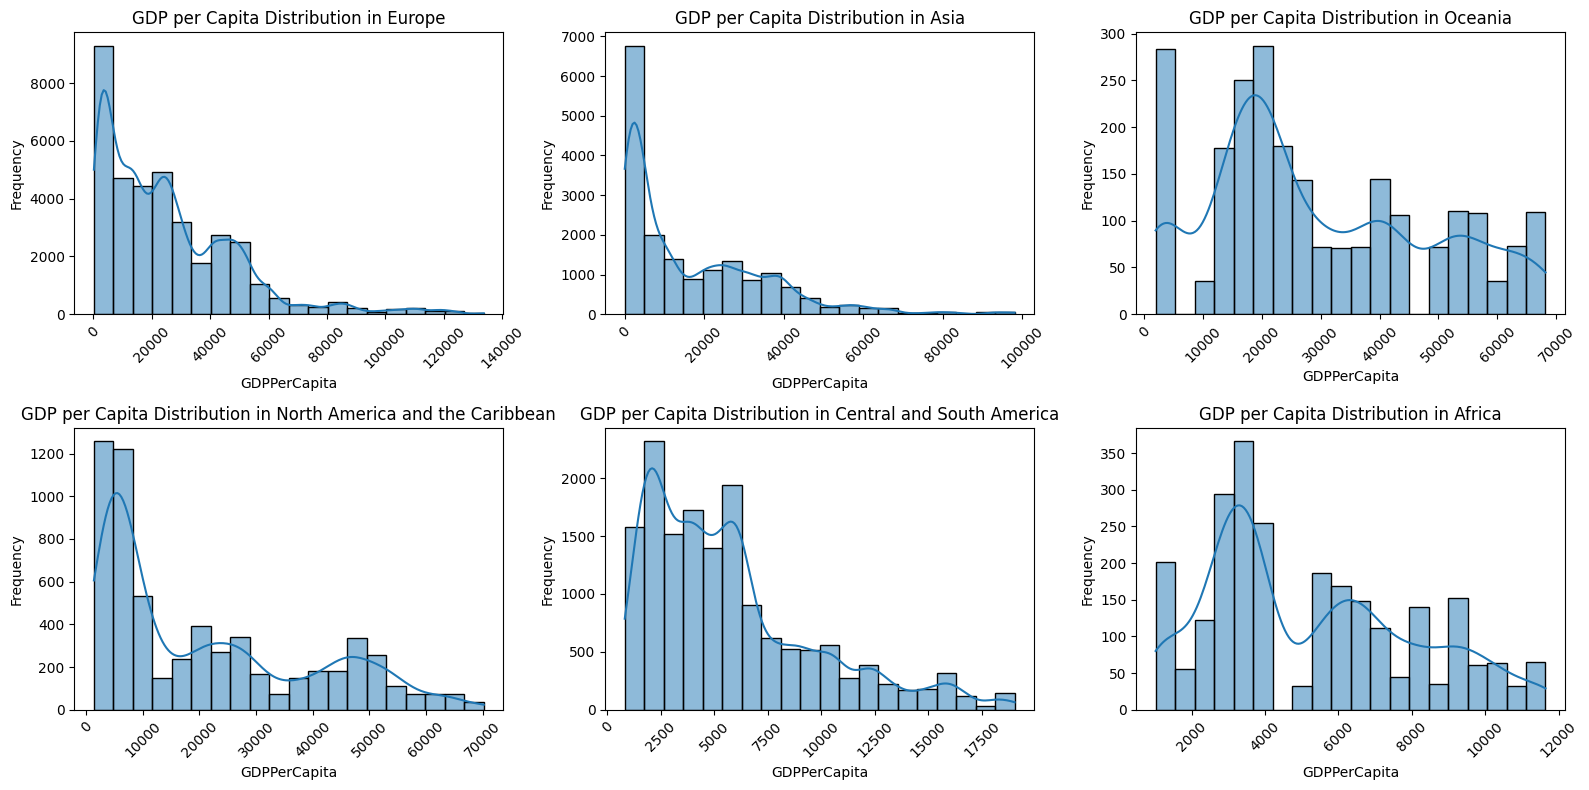

In [36]:
# Get the unique region names
unique_regions = df_copy['RegionName'].unique()

# Calculate the number of rows and columns for subplots
num_regions = len(unique_regions)
num_cols = 3  # Number of columns in the visualization
num_rows = -(-num_regions // num_cols)  # Ceiling division to determine the number of rows

# Create subplots with 3 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create separate histograms for GDPPerCapita distribution of each region
for i, region in enumerate(unique_regions):
    ax = axes[i]  # Select the current axis

    # Filter data for the current region
    region_data = df_copy[df_copy['RegionName'] == region]['GDPPerCapita'].dropna()

    # Create histogram on the current axis
    sns.histplot(region_data, bins=20, kde=True, ax=ax)
    ax.set_title(f'GDP per Capita Distribution in {region}')
    ax.set_xlabel('GDPPerCapita')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove unused axes and adjust layout
for j in range(num_regions, num_cols * num_rows):
  axes[j].remove()
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
# Calculate median GDPPerCapita for each region
median_gdp_cap_by_region = df_copy.groupby('RegionName')['GDPPerCapita'].median()

# Fill missing GDPPerCapita values with median GDP for each region
for region in median_gdp_cap_by_region.index:
    region_median_gdp_cap = median_gdp_cap_by_region[region]
    df_copy.loc[df_copy['RegionName'] == region, 'GDPPerCapita'] = df_copy.loc[df_copy['RegionName'] == region, 'GDPPerCapita'].fillna(region_median_gdp_cap)


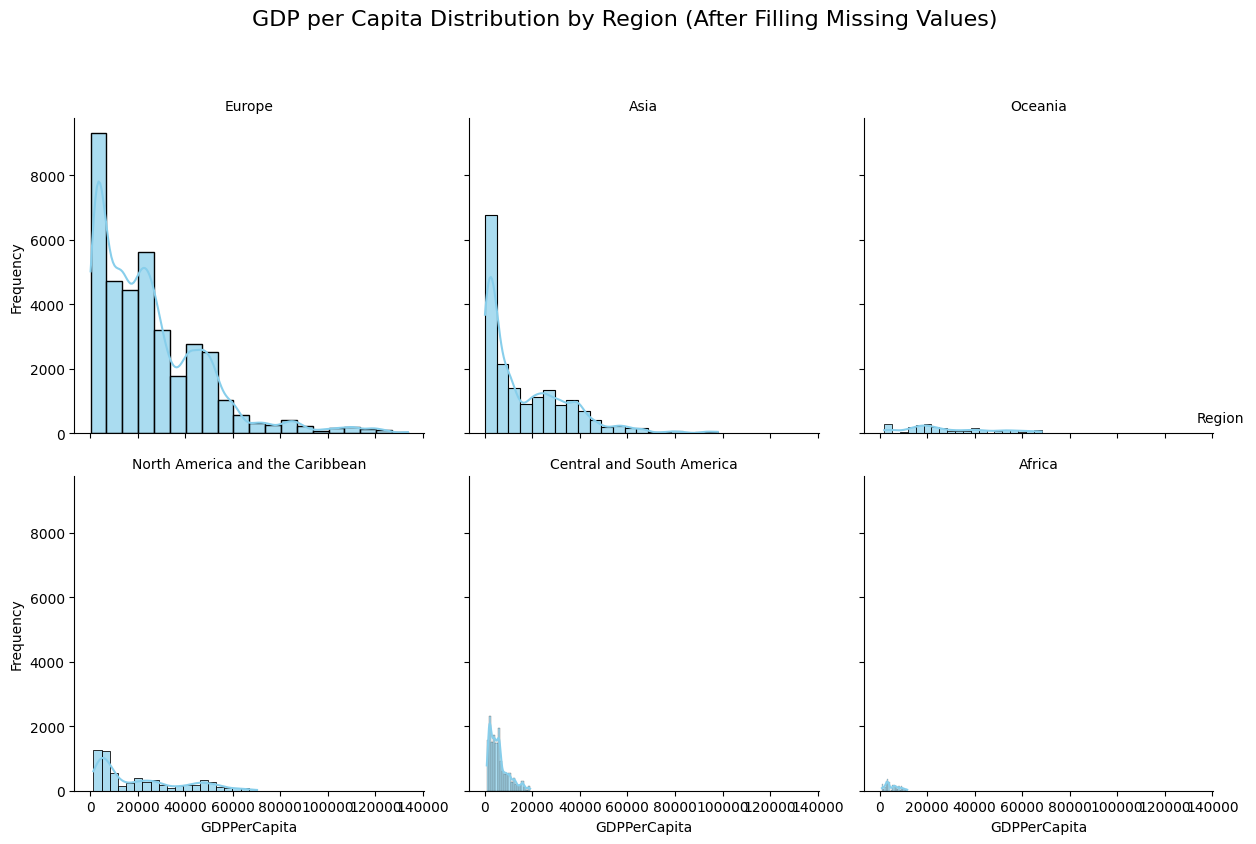

In [38]:
# Create a FacetGrid for separate plots by region
g = sns.FacetGrid(df_copy, col='RegionName', col_wrap=3, height=4)
g.map(sns.histplot, 'GDPPerCapita', bins=20, kde=True, color='skyblue', alpha=0.7)
g.set_titles('{col_name}')
g.set_axis_labels('GDPPerCapita', 'Frequency')
g.add_legend(title='Region')

plt.suptitle('GDP per Capita Distribution by Region (After Filling Missing Values)', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

In [39]:
df_copy.isna().sum()

RegionCode                      0
RegionName                      0
CountryCode                     0
CountryName                     0
Year                            0
Sex                             0
AgeGroup                        0
Generation                      0
SuicideCount                    0
Population                      0
GDP                             0
GDPPerCapita                    0
GrossNationalIncome          2729
GNIPerCapita                 2539
InflationRate                   0
EmploymentPopulationRatio       0
dtype: int64

### 2.9 Handling missing value on GrossNationalIncome column

In [40]:
# Filter rows where GNI is missing
missing_gni = df_copy[df_copy['GrossNationalIncome'].isnull()]

# Group by RegionName and count missing GNI values
missing_gni_by_region = missing_gni.groupby('RegionName')['GrossNationalIncome'].size().reset_index(name='Missing GNI Count')

# Print the result
print(missing_gni_by_region)

                  RegionName  Missing GNI Count
0                       Asia                351
1  Central and South America                 73
2                     Europe               2305


<ipython-input-41-d343bc34e3e0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RegionName', y='GrossNationalIncome', data=df_copy, palette='viridis')


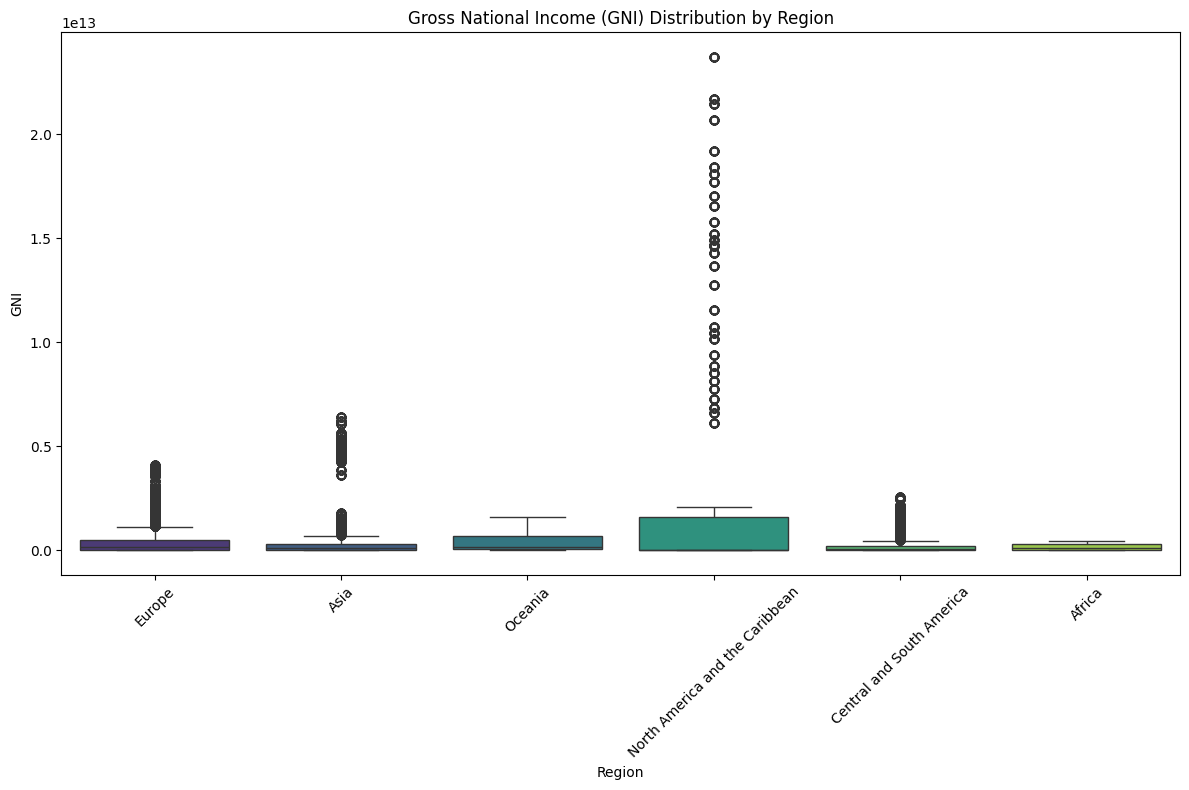

In [41]:
#visualization with outlier
# Create a box plot or violin plot for GNI distribution by region
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Box plot
sns.boxplot(x='RegionName', y='GrossNationalIncome', data=df_copy, palette='viridis')
plt.title('Gross National Income (GNI) Distribution by Region')
plt.xlabel('Region')
plt.ylabel('GNI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

<ipython-input-42-4f5ae44e55e0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RegionName', y='GrossNationalIncome', data=df_copy,\


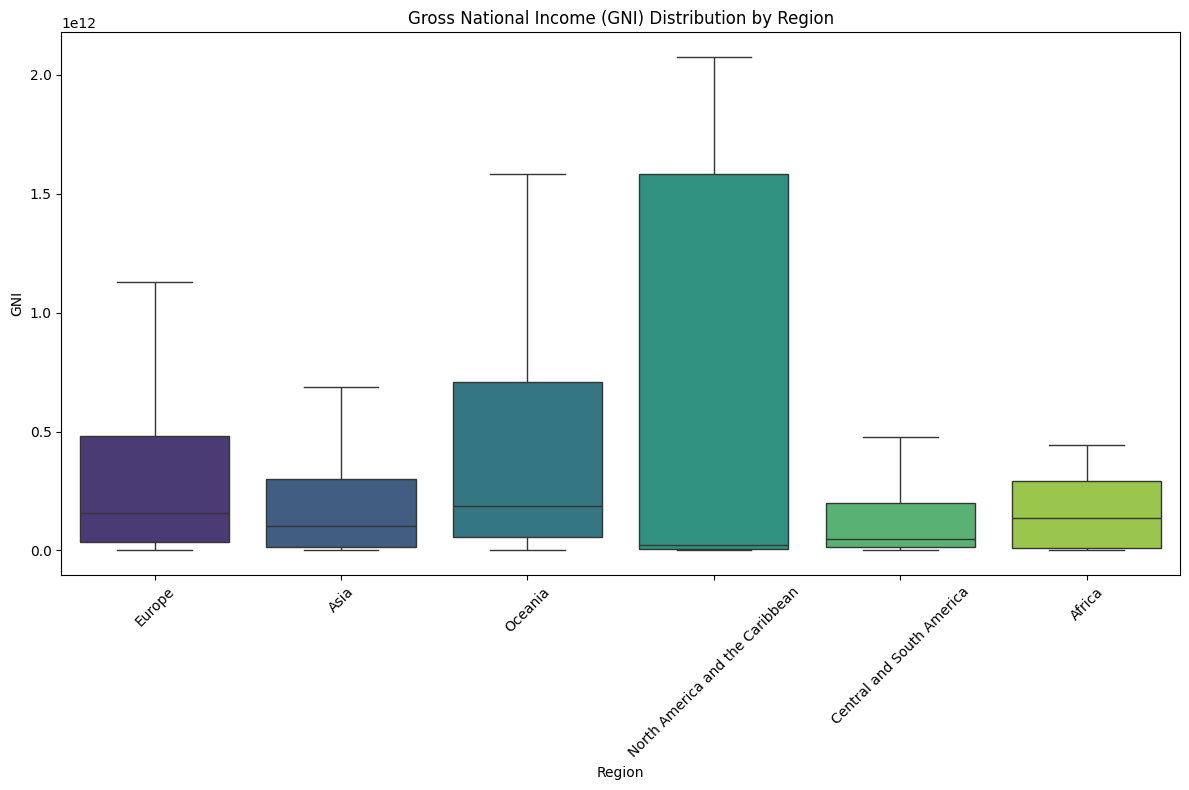

In [42]:
# Create a box plot or violin plot for GNI distribution by region
plt.figure(figsize=(12, 8))

# Box plot
sns.boxplot(x='RegionName', y='GrossNationalIncome', data=df_copy,\
            palette='viridis', showfliers = False)
plt.title('Gross National Income (GNI) Distribution by Region')
plt.xlabel('Region')
plt.ylabel('GNI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

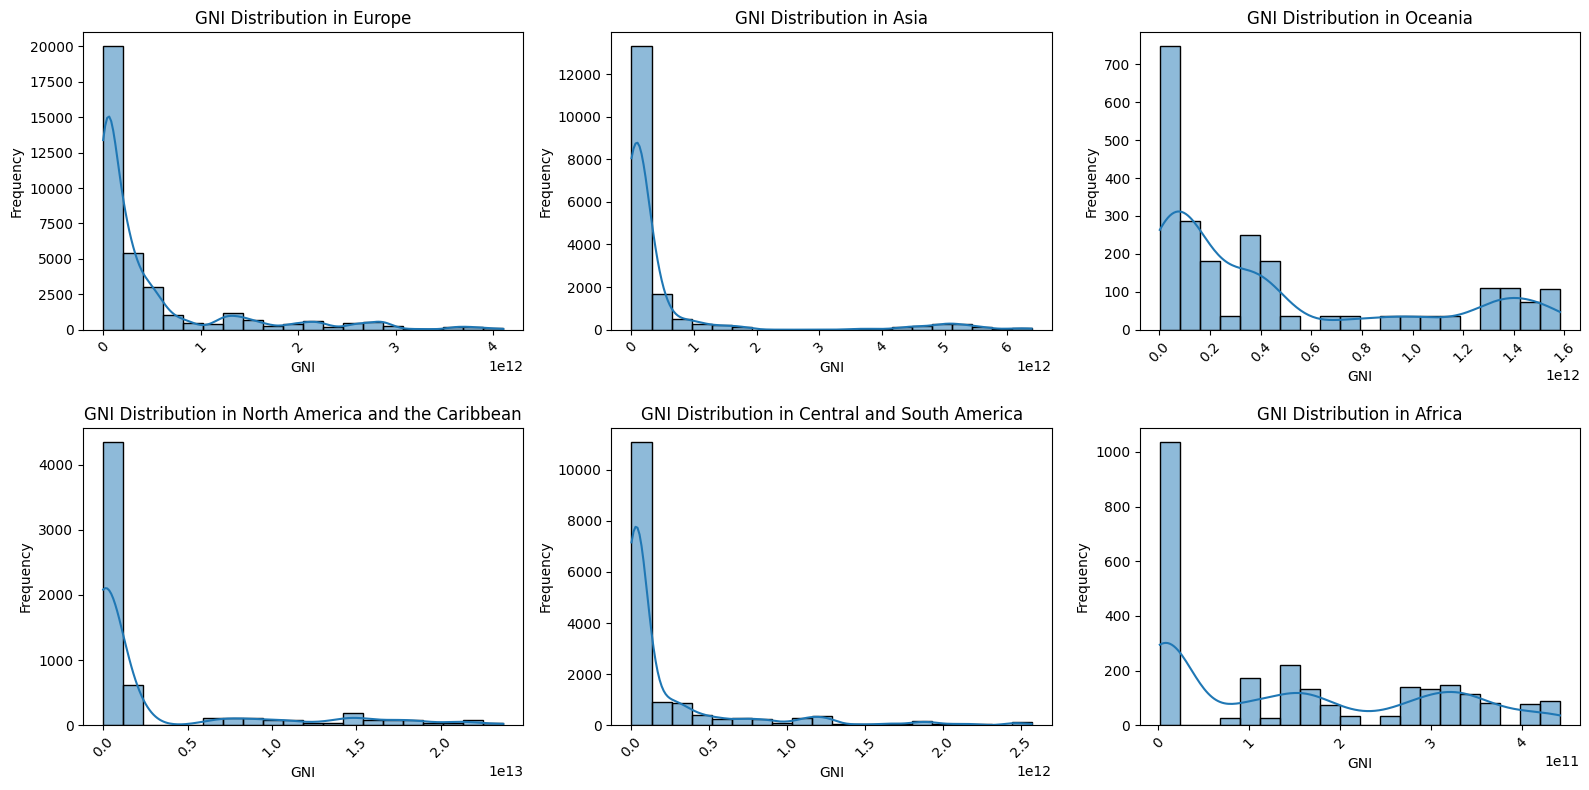

In [43]:
# Get the unique region names
unique_regions = df_copy['RegionName'].unique()

# Calculate the number of rows and columns for subplots
num_regions = len(unique_regions)
num_cols = 3  # Number of columns in the visualization
num_rows = -(-num_regions // num_cols)  # Ceiling division to determine the number of rows

# Create subplots with 3 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create separate histograms for GDP distribution of each region
for i, region in enumerate(unique_regions):
    ax = axes[i]  # Select the current axis

    # Filter data for the current region
    region_data = df_copy[df_copy['RegionName'] == region]['GrossNationalIncome'].dropna()

    # Create histogram on the current axis
    sns.histplot(region_data, bins=20, kde=True, ax=ax)
    ax.set_title(f'GNI Distribution in {region}')
    ax.set_xlabel('GNI')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove unused axes and adjust layout
for j in range(num_regions, num_cols * num_rows):
    axes[j].remove()
plt.tight_layout()

# Show the plot
plt.show()

In [44]:
# Calculate median GNI for each region
median_gni_by_region = df_copy.groupby('RegionName')['GrossNationalIncome'].median()

# Fill missing GNI values with median GNI for each region
for region in median_gni_by_region.index:
    region_median_gni = median_gni_by_region[region]
    df_copy.loc[df_copy['RegionName'] == region, 'GrossNationalIncome'] = df_copy.loc[df_copy['RegionName'] == region, 'GrossNationalIncome'].fillna(region_median_gni)


In [45]:
# Check for missing values in the DataFrame
missing_values = df_copy.isnull().any()

# Print columns with missing values, if any
if missing_values.any():
    print("Columns with missing values:")
    print(missing_values[missing_values].index)
else:
    print("No missing values in the DataFrame.")

Columns with missing values:
Index(['GNIPerCapita'], dtype='object')


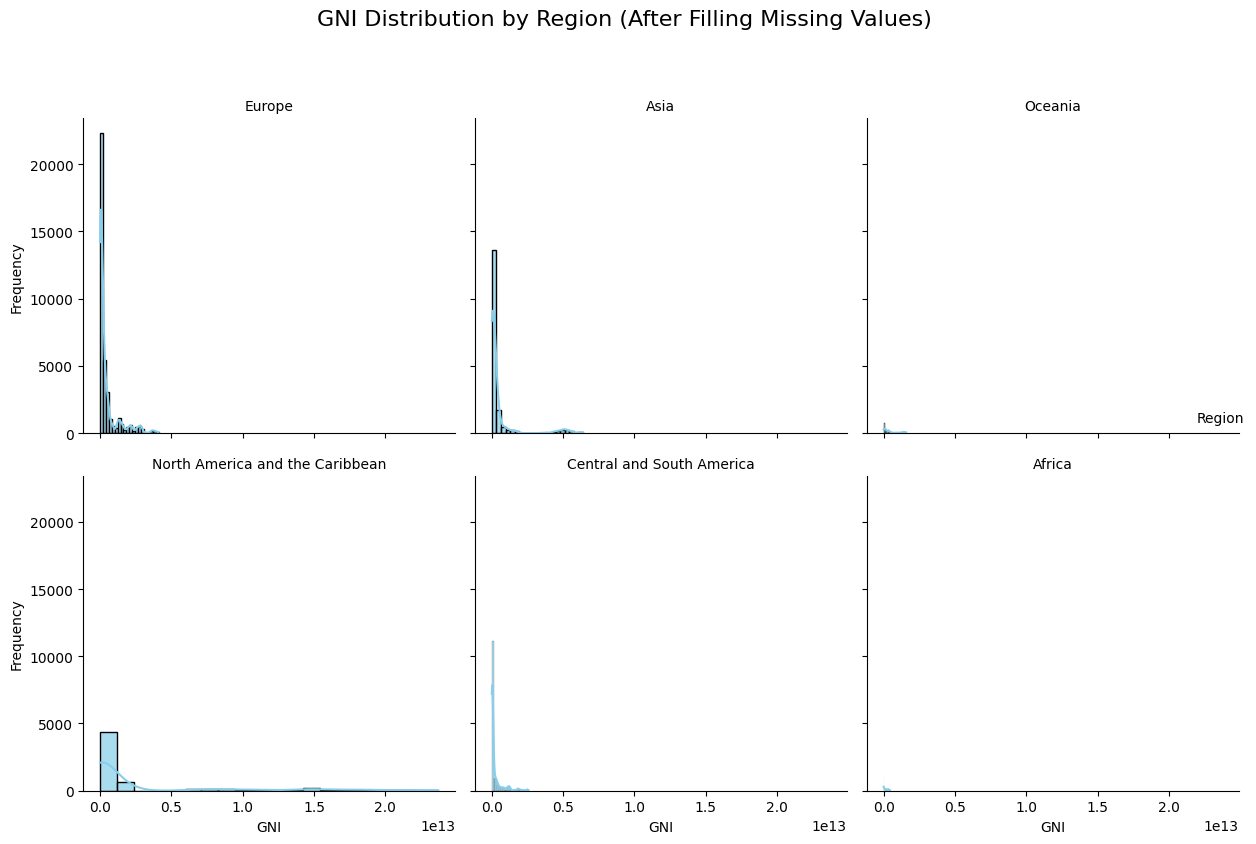

In [46]:
# Create a FacetGrid for separate plots by region
g = sns.FacetGrid(df_copy, col='RegionName', col_wrap=3, height=4)
g.map(sns.histplot, 'GrossNationalIncome', bins=20, kde=True, color='skyblue', alpha=0.7)
g.set_titles('{col_name}')
g.set_axis_labels('GNI', 'Frequency')
g.add_legend(title='Region')

plt.suptitle('GNI Distribution by Region (After Filling Missing Values)', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

In [47]:
df_copy.isna().sum()

RegionCode                      0
RegionName                      0
CountryCode                     0
CountryName                     0
Year                            0
Sex                             0
AgeGroup                        0
Generation                      0
SuicideCount                    0
Population                      0
GDP                             0
GDPPerCapita                    0
GrossNationalIncome             0
GNIPerCapita                 2539
InflationRate                   0
EmploymentPopulationRatio       0
dtype: int64

### 2.10 Handling missing value on GNIPerCapita column

In [48]:
# Filter rows where GNIPerCapita is missing
missing_gni_cap = df_copy[df_copy['GNIPerCapita'].isnull()]

# Group by RegionName and count missing GNIPerCapita values
missing_gni_cap_by_region = missing_gni_cap.groupby('RegionName')\
                            ['GNIPerCapita'].size().reset_index\
                             (name='Missing GNIPerCapita Count')

# Print the result
print(missing_gni_cap_by_region)

                  RegionName  Missing GNIPerCapita Count
0                       Asia                         508
1  Central and South America                         180
2                     Europe                        1851


<ipython-input-49-4983b9f9e4fe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RegionName', y='GNIPerCapita', data=df_copy, palette='viridis')


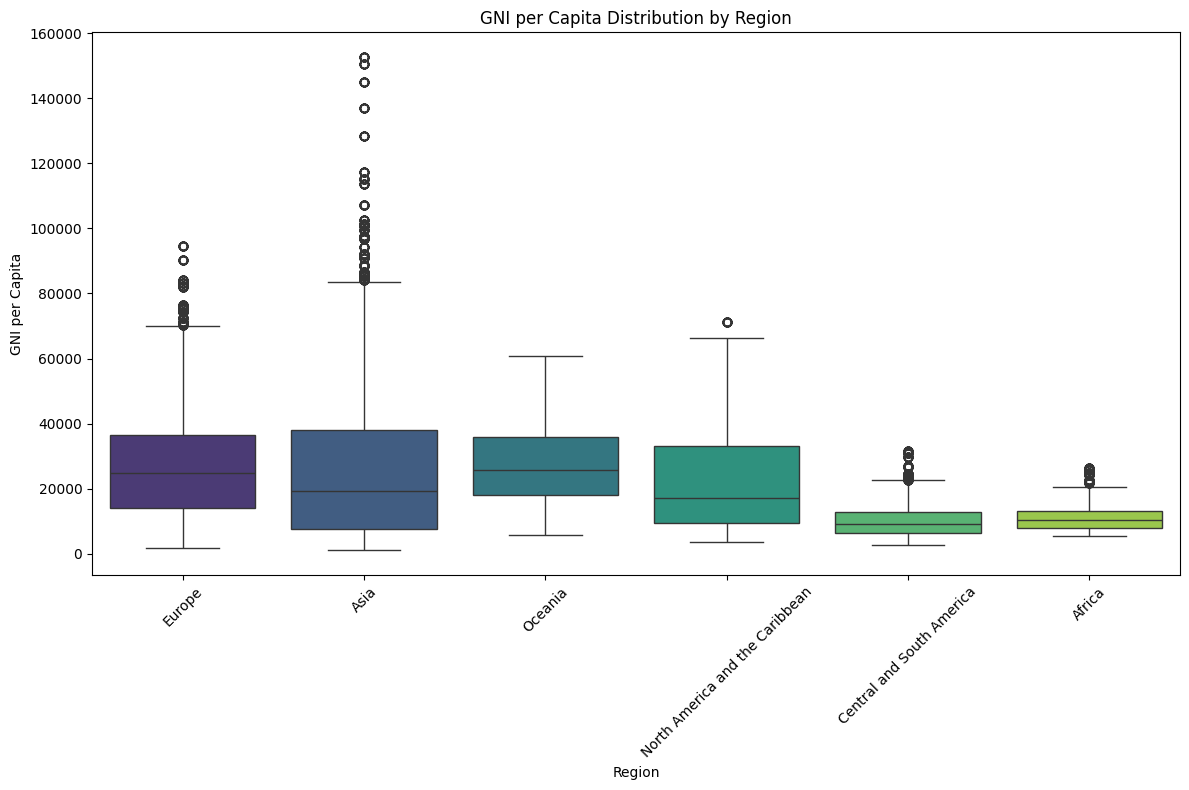

In [49]:
# Create a box plot or violin plot for GNIPerCapita distribution by region
plt.figure(figsize=(12, 8))

# Box plot
sns.boxplot(x='RegionName', y='GNIPerCapita', data=df_copy, palette='viridis')
plt.title('GNI per Capita Distribution by Region')
plt.xlabel('Region')
plt.ylabel('GNI per Capita')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-50-a38728276faf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RegionName', y='GNIPerCapita', data=df_copy, palette='viridis', showfliers=False)


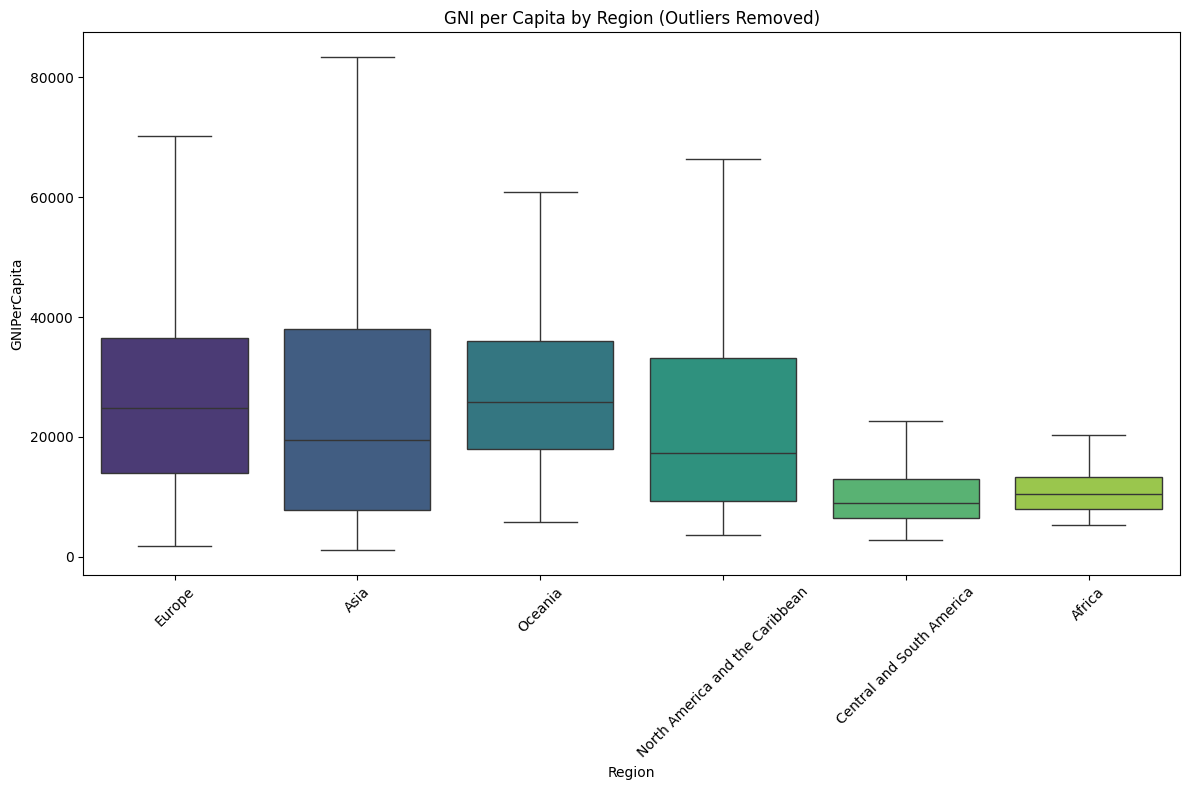

In [50]:
#visualize without outlier
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Box plot without outliers
sns.boxplot(x='RegionName', y='GNIPerCapita', data=df_copy, palette='viridis', showfliers=False)
plt.title('GNI per Capita by Region (Outliers Removed)')
plt.xlabel('Region')
plt.ylabel('GNIPerCapita')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

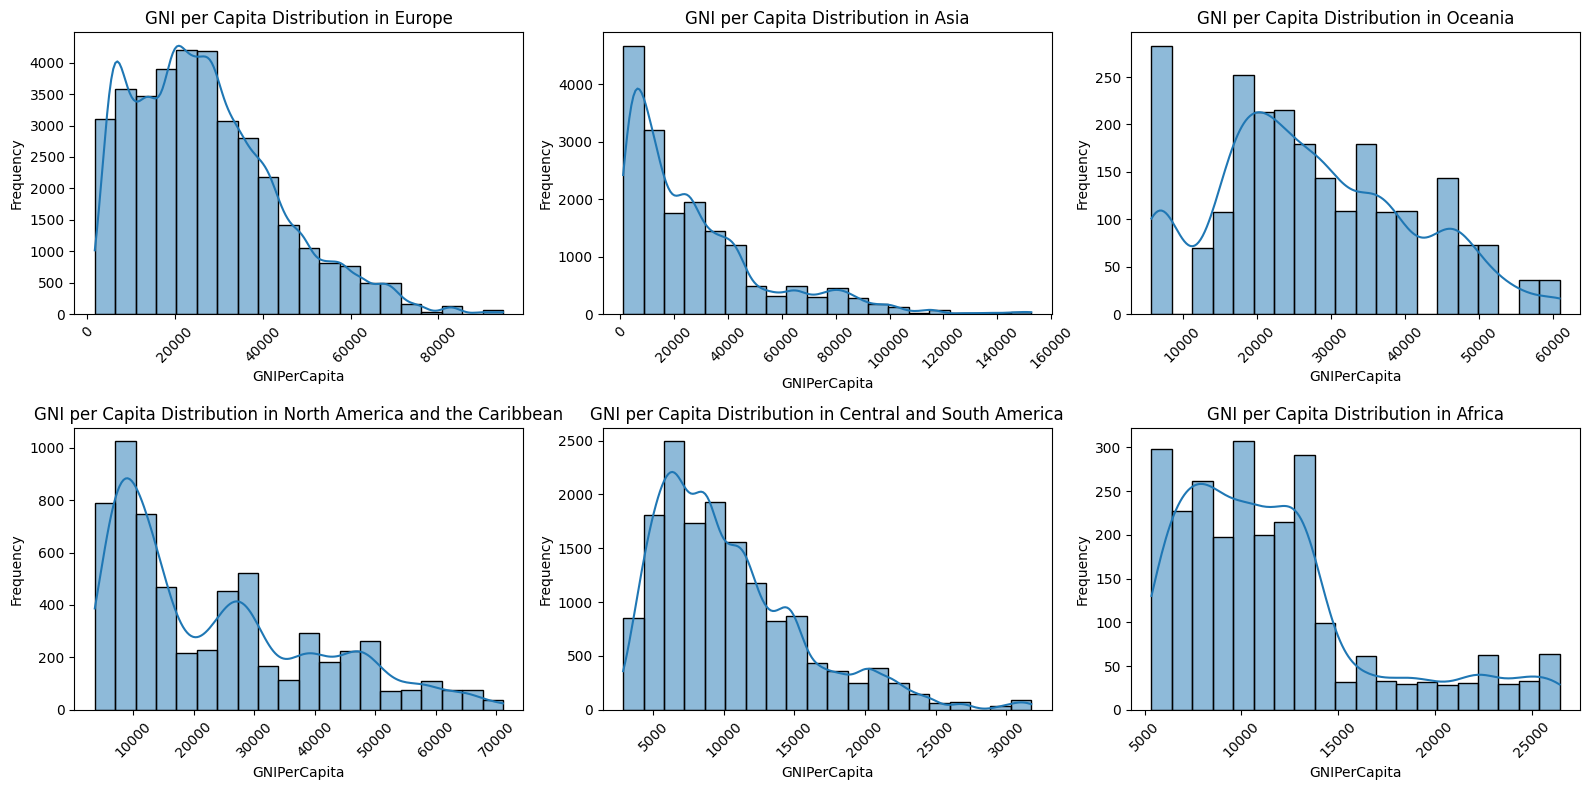

In [51]:
# Get the unique region names
unique_regions = df_copy['RegionName'].unique()

# Calculate the number of rows and columns for subplots
num_regions = len(unique_regions)
num_cols = 3  # Number of columns in the visualization
num_rows = -(-num_regions // num_cols)  # Ceiling division to determine the number of rows

# Create subplots with 3 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create separate histograms for GDP distribution of each region
for i, region in enumerate(unique_regions):
    ax = axes[i]  # Select the current axis

    # Filter data for the current region
    region_data = df_copy[df_copy['RegionName'] == region]['GNIPerCapita'].dropna()

    # Create histogram on the current axis
    sns.histplot(region_data, bins=20, kde=True, ax=ax)
    ax.set_title(f'GNI per Capita Distribution in {region}')
    ax.set_xlabel('GNIPerCapita')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove unused axes and adjust layout
for j in range(num_regions, num_cols * num_rows):
  axes[j].remove()
plt.tight_layout()

# Show the plot
plt.show()

In [52]:
# Calculate median GNIPerCapita for each region
median_gni_cap_by_region = df_copy.groupby('RegionName')['GNIPerCapita'].median()

# Fill missing GDP values with median GDP for each region
for region in median_gni_cap_by_region.index:
    region_median_gni_cap = median_gni_cap_by_region[region]
    df_copy.loc[df_copy['RegionName'] == region, 'GNIPerCapita'] = df_copy.loc[df_copy['RegionName'] == region, 'GNIPerCapita'].fillna(region_median_gni_cap)


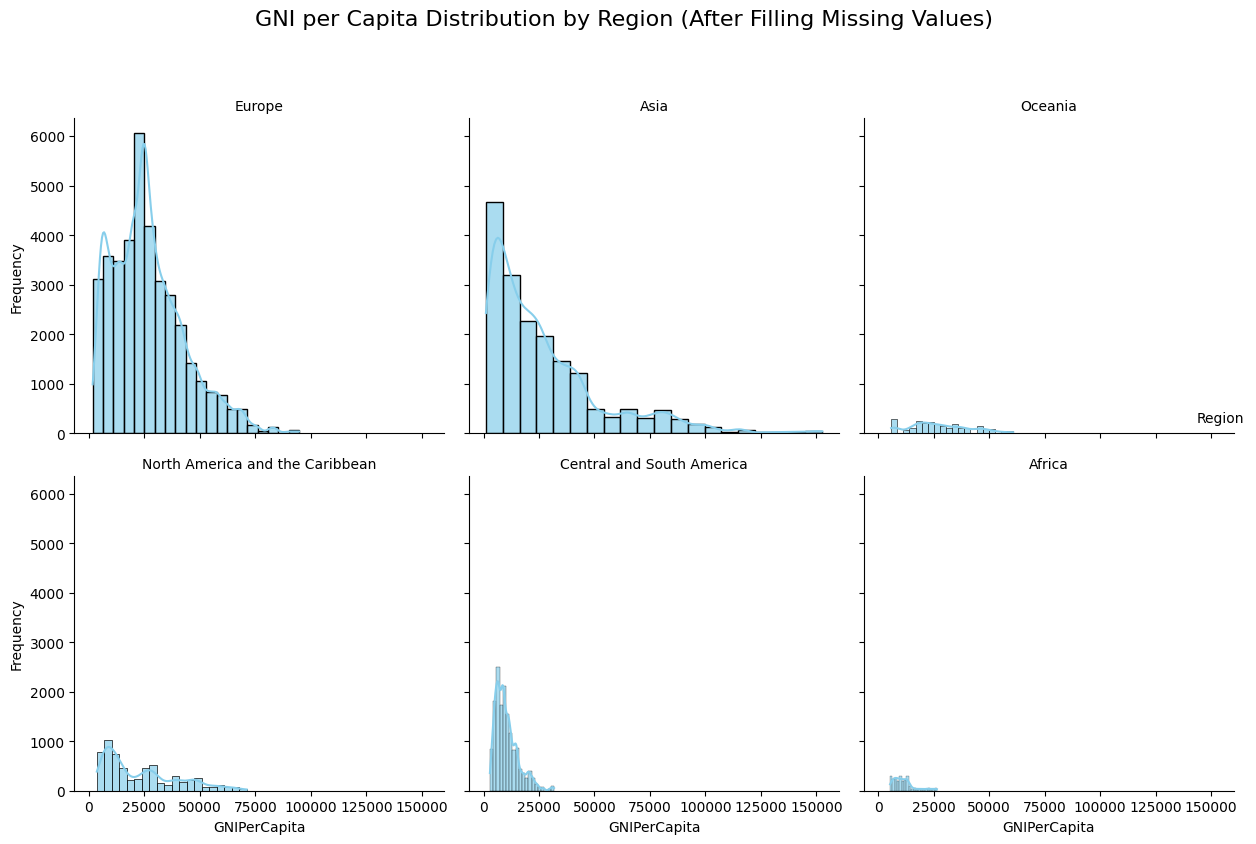

In [53]:
# Create a FacetGrid for separate plots by region
g = sns.FacetGrid(df_copy, col='RegionName', col_wrap=3, height=4)
g.map(sns.histplot, 'GNIPerCapita', bins=20, kde=True, color='skyblue', alpha=0.7)
g.set_titles('{col_name}')
g.set_axis_labels('GNIPerCapita', 'Frequency')
g.add_legend(title='Region')

plt.suptitle('GNI per Capita Distribution by Region (After Filling Missing Values)', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

In [54]:
df_copy.isna().sum()

RegionCode                   0
RegionName                   0
CountryCode                  0
CountryName                  0
Year                         0
Sex                          0
AgeGroup                     0
Generation                   0
SuicideCount                 0
Population                   0
GDP                          0
GDPPerCapita                 0
GrossNationalIncome          0
GNIPerCapita                 0
InflationRate                0
EmploymentPopulationRatio    0
dtype: int64

## 3. Save File

In [58]:
df_copy

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,4.0,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,25-34 years,Millennials,3.0,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,25-34 years,Millennials,4.0,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81887,NAC,North America and the Caribbean,USA,United States of America,2021,Female,55-74 years,Baby Boomers,420.0,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
81888,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,276.0,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
81889,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,158.0,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
81890,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,127.0,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946


In [56]:
# Save the cleaned DataFrame to a CSV file
df_copy.to_csv('cleaned_suicide_rates_1990-2022.csv', index=False)


## 4. Check heatmap for each columns (addition)

<ipython-input-57-b949b3e7c226>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_copy.corr(method = 'kendall')


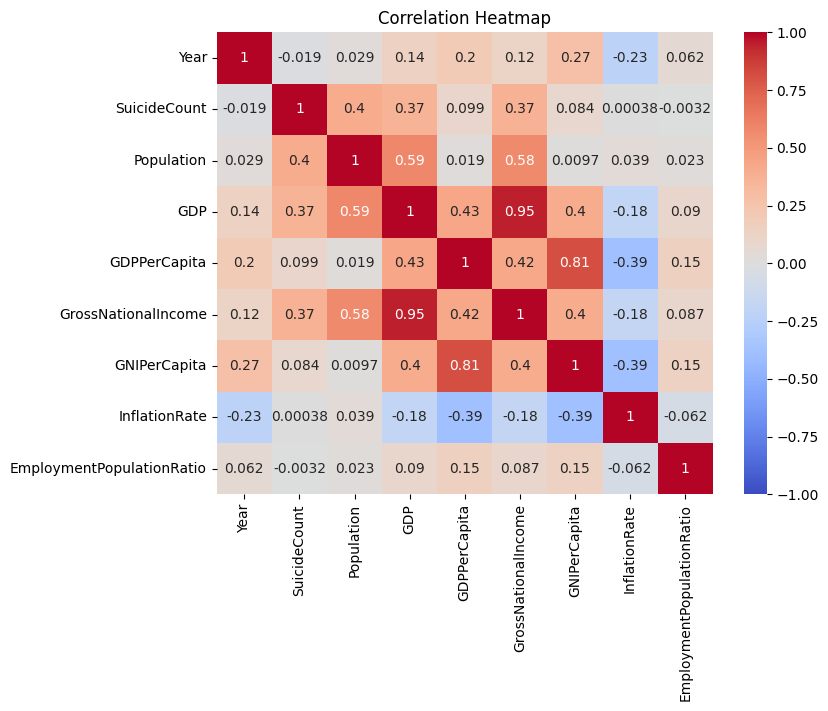

In [57]:
# Calculate the correlation matrix
corr_matrix = df_copy.corr(method = 'kendall')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()